# Car Make and Model Recognizer
I shall explore here my tries to reach a good optimizer

## Importing Libraries

In [1]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Flatten, Dense, BatchNormalization, Activation, PReLU
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from glob import glob
from keras import regularizers
from keras.layers.advanced_activations import PReLU

Using TensorFlow backend.


## Pre-Processing

### Data Augmentation

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.25,
                                   rotation_range = 90,
                                   horizontal_flip=True,
                                  validation_split = 0.3)
#test_datagen = ImageDataGenerator(rescale=1./255,
 #                                horizontal_flip = True)

train_data = train_datagen.flow_from_directory('My_Cars/trainCropped',
                                              target_size=(128, 128),
                                              batch_size=32,
                                              class_mode='categorical',
                                              subset='training')
test_data = train_datagen.flow_from_directory('My_Cars/trainCropped',
                                              target_size=(128, 128),
                                              batch_size=32,
                                              class_mode='categorical',
                                            subset='validation')

Found 5796 images belonging to 196 classes.
Found 2348 images belonging to 196 classes.


## Model

In [3]:
model = Sequential()


### TODO: Define your architecture.
model.add(Conv2D(filters=32, kernel_size=4, strides=1,kernel_initializer = 'random_normal', padding='same', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(PReLU())
#act = PReLU(weights=None, alpha_initializer="zero")
#model.add(act)
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=128, kernel_size=2, strides=1,kernel_initializer = 'random_normal', padding='same')) 
model.add(BatchNormalization())
#model.add(Activation("relu"))
model.add(PReLU())
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=256, kernel_size=2, strides=1,kernel_initializer = 'random_normal', padding='same'))
model.add(BatchNormalization())
#model.add(Activation("relu"))
model.add(PReLU())
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=512, kernel_size=2, strides=1,kernel_initializer = 'random_normal', padding='same'))
model.add(BatchNormalization())
#model.add(Activation("relu"))
model.add(PReLU())
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=512, kernel_size=2, strides=1,kernel_initializer = 'random_normal',padding='same'))
model.add(BatchNormalization())
#model.add(Activation("relu"))
model.add(PReLU())
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(GlobalAveragePooling2D())

model.add(Dense(196, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      1568      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
p_re_lu_1 (PReLU)            (None, 128, 128, 32)      524288    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       16512     
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 128)       512       
_________________________________________________________________
p_re_lu_2 (PReLU)            (None, 64, 64, 128)       524288    
__________

### Train

In [5]:
from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 100

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='Saved_Models/weights.best.from_scratch35.hdf5', 
                               verbose=1, save_best_only=True)

Saving = model.fit_generator(train_data,
          steps_per_epoch=182,  
          epochs=epochs,
          verbose=1, 
          validation_data=test_data,
          validation_steps=74,
          callbacks=[checkpointer])
# model.fit(train_data, test_data,
#                   callbacks = [checkpointer],
#                   validation_split = 0.33,
#                   epochs=epochs,
#           batch_size = 20,
#           verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
182/182 [==============================] - 63s 345ms/step - loss: 5.3727 - acc: 0.0148 - val_loss: 5.8882 - val_acc: 0.0209

Epoch 00001: val_loss improved from inf to 5.88820, saving model to Saved_Models/weights.best.from_scratch35.hdf5
Epoch 2/100
182/182 [==============================] - 59s 323ms/step - loss: 5.1242 - acc: 0.0223 - val_loss: 5.3140 - val_acc: 0.0153

Epoch 00002: val_loss improved from 5.88820 to 5.31400, saving model to Saved_Models/weights.best.from_scratch35.hdf5
Epoch 3/100
182/182 [==============================] - 58s 316ms/step - loss: 4.9810 - acc: 0.0376 - val_loss: 5.9691 - val_acc: 0.0192

Epoch 00003: val_loss did not improve from 5.31400
Epoch 4/100
182/182 [==============================] - 57s 316ms/step - loss: 4.8486 - acc: 0.0410 - val_loss: 5.8545 - val_acc: 0.0166

Epoch 00004: val_loss did not improve from 5.31400
Epoch 5/100
182/182 [==============================] - 58s 316ms/step 

182/182 [==============================] - 63s 344ms/step - loss: 1.6313 - acc: 0.5795 - val_loss: 6.5428 - val_acc: 0.0796

Epoch 00041: val_loss did not improve from 4.69875
Epoch 42/100
182/182 [==============================] - 61s 334ms/step - loss: 1.5439 - acc: 0.5960 - val_loss: 5.5068 - val_acc: 0.1112

Epoch 00042: val_loss did not improve from 4.69875
Epoch 43/100
182/182 [==============================] - 63s 344ms/step - loss: 1.5074 - acc: 0.5974 - val_loss: 5.6263 - val_acc: 0.0992

Epoch 00043: val_loss did not improve from 4.69875
Epoch 44/100
182/182 [==============================] - 62s 343ms/step - loss: 1.4387 - acc: 0.6192 - val_loss: 4.8616 - val_acc: 0.1452

Epoch 00044: val_loss did not improve from 4.69875
Epoch 45/100
182/182 [==============================] - 63s 344ms/step - loss: 1.3929 - acc: 0.6374 - val_loss: 5.7407 - val_acc: 0.1261

Epoch 00045: val_loss did not improve from 4.69875
Epoch 46/100
182/182 [==============================] - 64s 351ms/st

182/182 [==============================] - 61s 335ms/step - loss: 0.3009 - acc: 0.9150 - val_loss: 6.1888 - val_acc: 0.1878

Epoch 00084: val_loss did not improve from 4.69875
Epoch 85/100
182/182 [==============================] - 60s 331ms/step - loss: 0.3053 - acc: 0.9171 - val_loss: 6.6174 - val_acc: 0.1589

Epoch 00085: val_loss did not improve from 4.69875
Epoch 86/100
182/182 [==============================] - 60s 330ms/step - loss: 0.2906 - acc: 0.9179 - val_loss: 10.1249 - val_acc: 0.0835

Epoch 00086: val_loss did not improve from 4.69875
Epoch 87/100
182/182 [==============================] - 60s 330ms/step - loss: 0.2964 - acc: 0.9160 - val_loss: 8.6044 - val_acc: 0.0945

Epoch 00087: val_loss did not improve from 4.69875
Epoch 88/100
182/182 [==============================] - 61s 334ms/step - loss: 0.2917 - acc: 0.9167 - val_loss: 7.5722 - val_acc: 0.1559

Epoch 00088: val_loss did not improve from 4.69875
Epoch 89/100
182/182 [==============================] - 62s 340ms/s

In [6]:

vals = pd.DataFrame.from_dict(Saving.history)
vals = pd.concat([pd.Series(range(0,100),name='epochs'),vals],axis=1)
vals.head(n=31)

,epochs,val_loss,val_acc,loss,acc
0,0,5.888204,0.020869,5.369080,0.014838
1,1,5.313997,0.015332,5.124028,0.022429
2,2,5.969085,0.019165,4.971480,0.036577
3,3,5.854451,0.016610,4.843707,0.041235
4,4,5.593656,0.028109,4.746459,0.048137
5,5,5.198845,0.032794,4.654727,0.061594
6,6,4.954999,0.041738,4.567085,0.074879
7,7,5.408844,0.033220,4.488131,0.074707
8,8,4.810167,0.054940,4.395100,0.086094
9,9,5.437779,0.034497,4.305464,0.099724


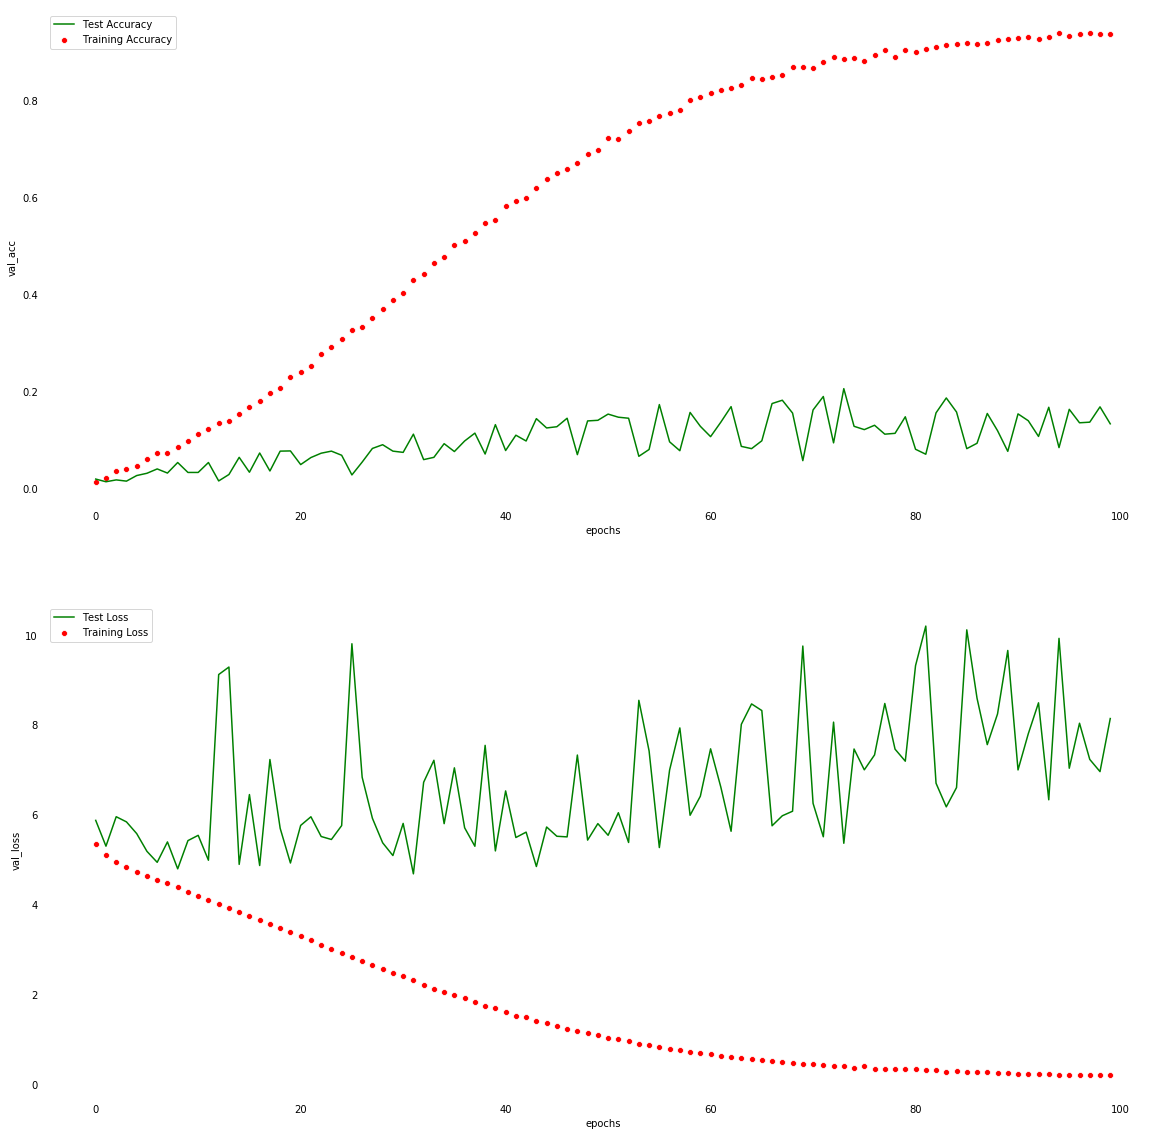

In [7]:
import seaborn as sns
sns.set_style({'xtick.bottom':False,
               'ytick.left':False,
               'axes.spines.bottom': False,
               'axes.spines.left': False,
               'axes.spines.right': False,
               'axes.spines.top': False})

ig,(ax,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(20,20))
sns.scatterplot(x='epochs',y='acc',data=vals,ax=ax,color='r')
sns.lineplot(x='epochs',y='val_acc',data=vals,ax=ax,color='g')
sns.scatterplot(x='epochs',y='loss',data=vals,ax=ax1,color='r')
sns.lineplot(x='epochs',y='val_loss',data=vals,ax=ax1,color='g')
ax.legend(labels=['Test Accuracy','Training Accuracy'])
ax1.legend(labels=['Test Loss','Training Loss'])

In [ ]:
# for i in range(n_iterations):
#         print('\r{}/{}'. format(i, n_iterations))
#         #initilaize random hyperparameters
#         random_parameters = {K: random.sample(V, 1)[0] for K, V in parameters_grid.items()}
#         #create model with random hyperparameters
#         model = create_model(random_parameters)
#         opt = create_RMSprop_optimizer(random_parameters)
#         #compile model
#         model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])
#         #train model
#         epochs = 40
#         checkpointer = ModelCheckpoint(filepath='saved_models/model_weights.hdf5', verbose=1, save_best_only=True)
#         early_stopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 8)
#         history = model.fit(X_train, Y_train,
#                   callbacks = [checkpointer, early_stopping],
#                   validation_split = 0.33,
#                   epochs=epochs, batch_size = 20, verbose=1)
#         #compare current min validation loss with global min validation loss
#         current_min_val_loss = np.min(history.history['val_loss'])
#         if(current_min_val_loss < global_min_val_loss):
#             global_min_val_loss = current_min_val_loss
#             #save the best model so far
#             model.load_weights('saved_models/model_weights.hdf5')
#             model.save('saved_models/best_model.h5')
#             print('saving new best model, val_loss = {}'.format(current_min_val_loss))
#             #save best hyperparameters
#             best_hyperparameters = random_parameters